# Using Local Geospatial Data

```{contents}
:local:
:depth: 2
```

## Introduction

## Technical requirements

```bash
conda create -n gee python
conda activate gee
conda install -c conda-forge mamba
mamba install -c conda-forge pygis
```

```bash
jupyter lab
```

In [20]:
# %pip install pygis

In [21]:
import ee
import geemap

In [22]:
geemap.ee_initialize()

## Local raster datasets

### Single-band imagery

In [23]:
## Sirve para descargar cualquier archivo
url = 'https://github.com/giswqs/data/raw/main/raster/srtm90.tif' # Alojado en un server de Github
filename = 'dem.tif'
geemap.download_file(url, filename)

dem.tif already exists. Skip downloading. Set overwrite=True to overwrite.


'c:\\Users\\skype\\VS-python-codes\\practicas-GEE\\dem.tif'

In [24]:
Map = geemap.Map()
Map.add_raster(filename, cmap='terrain', layer_name="DEM")
vis_params = {'min': 0, 'max': 4000, 'palette': 'terrain'}
Map.add_colorbar(vis_params, label='Elevation (m)')
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [25]:
# Util para ver todas las paletas de color disponibles
import geemap.colormaps as cm

cm.list_colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Grays',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'coo

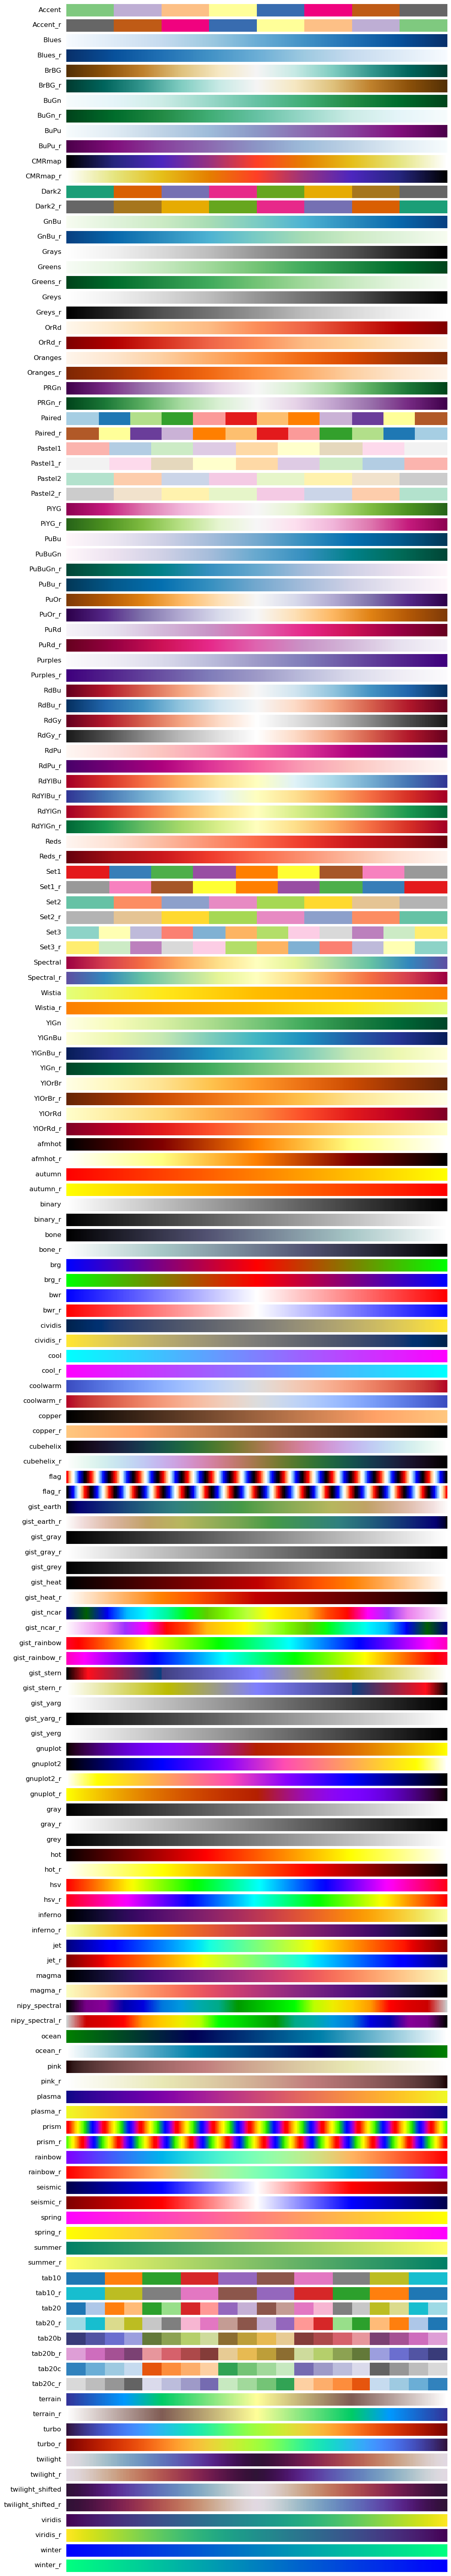

In [26]:
cm.plot_colormaps(width=12, height=0.4)

### Multi-band imagery

In [27]:
## Sirve para descargar cualquier archivo
url = 'https://github.com/giswqs/leafmap/raw/master/examples/data/cog.tif'
filename = 'cog.tif'
geemap.download_file(url, filename)

cog.tif already exists. Skip downloading. Set overwrite=True to overwrite.


'c:\\Users\\skype\\VS-python-codes\\practicas-GEE\\cog.tif'

In [28]:
# La diferencia con respecto a la anterior, es que tienes que especificas las bandas en una lista
# Si no especifico la banda
Map = geemap.Map()
Map.add_raster(filename, band=[4, 1, 2], layer_name="Color infrared")
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

### Interactive raster GUI

## Cloud Optimized GeoTIFF (COG)

### Visualizing COG

In [29]:
url = 'https://tinyurl.com/24bo8umr'

In [30]:
# Aceso a los bounds sin descargar la img
geemap.cog_bounds(url)

[-108.63447456563128,
 38.963980238226654,
 -108.38008268561431,
 40.025815049929754]

In [31]:
# Aceso al punto central sin descargar
geemap.cog_center(url)

(-108.5072786256228, 39.49489764407821)

In [32]:
# Nombres de las bandas
geemap.cog_bands(url)

['b1', 'b2', 'b3']

In [33]:
# Esto es el "título de la película" -> no nocesitas descargarlo, solamente verlo online
geemap.cog_tile(url)

'https://titiler.xyz/cog/tiles/WebMercatorQuad/{z}/{x}/{y}@1x?url=https%3A%2F%2Fopendata.digitalglobe.com%2Fevents%2Fcalifornia-fire-2020%2Fpre-event%2F2018-02-16%2Fpine-gulch-fire20%2F1030010076004E00.tif&bidx=1&bidx=2&bidx=3&rescale=1.0%2C251.0'

In [34]:
Map = geemap.Map()
Map.add_cog_layer(url, name="Fire (pre-event)")
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [35]:
## Cargamos también la imagen post-incendio 
url2 = 'https://tinyurl.com/2awjl66w'
Map.add_cog_layer(url2, name="Fire (post-event)")
Map

Map(center=[39.49489764407821, -108.5072786256228], controls=(WidgetControl(options=['position', 'transparent_…

## EJERCICIO: Leer en local imágenes 

In [46]:
## Sirve para descargar cualquier archivo
url = 'https://github.com/Pablomir16/practicas-GEE/blob/main/data/D1_landuse.tif' # Alojado en un server de Github
filename = 'landuse_git.tif'
geemap.download_file(url, filename,overwrite=True)

Downloading...
From: https://raw.githubusercontent.com/Pablomir16/practicas-GEE/main/data/D1_landuse.tif
To: c:\Users\skype\VS-python-codes\practicas-GEE\landuse_git.tif
100%|██████████| 1.99M/1.99M [00:00<00:00, 4.18MB/s]


'c:\\Users\\skype\\VS-python-codes\\practicas-GEE\\landuse_git.tif'

In [52]:
Map = geemap.Map()
Map.add_raster(filename, cmap='terrain', layer_name="DEM")
vis_params = {'min': 0, 'max': 12, 'palette': 'tab10'}
Map.add_colorbar(vis_params, label='Elevation (m)')
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [54]:
url = 'https://github.com/Pablomir16/practicas-GEE/blob/main/data/D1_landuse.tif'
geemap.cog_validate(url)

RasterioIOError: '/vsicurl/https://github.com/Pablomir16/practicas-GEE/blob/main/data/D1_landuse.tif' not recognized as a supported file format.

In [56]:
geemap.cog_validate(url, verbose=True)

RasterioIOError: '/vsicurl/https://github.com/Pablomir16/practicas-GEE/blob/main/data/D1_landuse.tif' not recognized as a supported file format.

### Creating COG

In [ ]:
url = "https://github.com/giswqs/data/raw/main/raster/srtm90.tif"
geemap.cog_validate(url)

In [ ]:
geemap.cog_validate(url, verbose=True)

In [ ]:
out_cog = "cog.tif"
geemap.image_to_cog(url, out_cog)

In [ ]:
geemap.cog_validate(out_cog)

In [ ]:
Map = geemap.Map()
Map.add_raster(out_cog, cmap="terrain", layer_name="Local COG")
Map.add_cog_layer(url, cmap="gist_earth", name="Remote COG")
vis_params = {'min': 0, 'max': 4000, 'palette': 'gist_earth'}
Map.add_colorbar(vis_params, label='Elevation (m)')
Map

### Converting NumPy arrays to COG

In [ ]:
url = 'https://github.com/giswqs/leafmap/raw/master/examples/data/cog.tif'
in_cog = 'cog.tif'
out_cog = "ndvi.tif"
geemap.download_file(url, in_cog, overwrite=True)

In [ ]:
arr = geemap.image_to_numpy(in_cog)

In [ ]:
arr.shape

In [ ]:
ndvi = (arr[3] - arr[0]) / (arr[3] + arr[0])

In [ ]:
ndvi.shape

In [ ]:
geemap.numpy_to_cog(ndvi, out_cog, profile=in_cog)

In [ ]:
Map = geemap.Map()
Map.add_raster(in_cog, band=[4, 1, 2], layer_name="Color infrared")
Map.add_raster(out_cog, cmap="Greens", layer_name="NDVI")
Map

### Clipping image by mask

In [ ]:
url = 'https://github.com/giswqs/data/raw/main/raster/srtm90.tif'
dem = 'dem.tif'
geemap.download_file(url, dem)

In [ ]:
Map = geemap.Map()
Map.add_raster(dem, cmap='terrain', layer_name="DEM")
Map

In [ ]:
mask = (
    'https://raw.githubusercontent.com/giswqs/leafmap/master/examples/data/mask.geojson'
)

In [ ]:
mask = Map.user_roi

In [ ]:
mask = [
    [-119.679565, 37.256566],
    [-119.679565, 38.061067],
    [-118.24585, 38.061067],
    [-118.24585, 37.256566],
    [-119.679565, 37.256566],
]

In [ ]:
output = 'clip.tif'
geemap.clip_image(dem, mask, output)
Map.add_raster(output, cmap='coolwarm', layer_name="Clip Image")
Map

## SpatioTemporal Asset Catalog (STAC)

In [57]:
url = 'https://tinyurl.com/22vptbws'

In [58]:
geemap.stac_bounds(url)

[-111.6453245, 60.59892389999882, -110.1583693, 61.30928879999903]

In [59]:
geemap.stac_center(url)

(-110.90184690000001, 60.95410634999892)

In [60]:
geemap.stac_bands(url)

['pan', 'B1', 'B2', 'B3', 'B4']

In [61]:
geemap.stac_tile(url, bands=['B3', 'B2', 'B1'])

'https://titiler.xyz/stac/tiles/WebMercatorQuad/{z}/{x}/{y}@1x?url=https%3A%2F%2Fcanada-spot-ortho.s3.amazonaws.com%2Fcanada_spot_orthoimages%2Fcanada_spot5_orthoimages%2FS5_2007%2FS5_11055_6057_20070622%2FS5_11055_6057_20070622.json&assets=B3&assets=B2&assets=B1'

In [62]:
Map = geemap.Map()
Map.add_stac_layer(url, bands=['pan'], name='Panchromatic')
Map.add_stac_layer(url, bands=['B3', 'B2', 'B1'], name='False color')
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

## Vector datasets

### GeoJSON

(!!) Nota: esto de añadir datos vectoriales desde un GeoJSON es interesante pero solo con archivos pequeños. Dice que a partir de 100 mb colapsa el jupy

In [63]:
## Se le pasa igual la URL 
in_geojson = 'https://github.com/gee-community/geemap/blob/master/examples/data/cable_geo.geojson'
Map = geemap.Map()
# Se puede cambiar info_mode=on_click para que aparezca la información solamente cuando haces click y no cuando pasas el ratón
Map.add_geojson(in_geojson, layer_name="Cable lines", info_mode="on_hover")
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [64]:
Map = geemap.Map()
Map.add_basemap("CartoDB.DarkMatter")
callback = lambda feat: {"color": "#" + feat["properties"]["color"], "weight": 2}
Map.add_geojson(in_geojson, layer_name="Cable lines", style_callback=callback)
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [65]:
url = "https://github.com/gee-community/geemap/blob/master/examples/data/countries.geojson"
Map = geemap.Map()
Map.add_geojson(
    url, layer_name="Countries", fill_colors=['red', 'yellow', 'green', 'orange']
)
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [66]:
import random

Map = geemap.Map()


def random_color(feature):
    return {
        'color': 'black',
        'weight': 3,
        'fillColor': random.choice(['red', 'yellow', 'green', 'orange']),
    }


Map.add_geojson(url, layer_name="Countries", style_callback=random_color)
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [70]:
Map = geemap.Map()

style = {
    "stroke": True,
    "color": "#0000ff",
    "weight": 2,
    "opacity": 1,
    "fill": True,
    "fillColor": "#0000ff",
    "fillOpacity": 0.7,
}

hover_style = {"fillOpacity": 0}

Map.add_geojson(url, layer_name="Countries", style=style, hover_style=hover_style)
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

### Shapefile

In [71]:
url = "https://github.com/gee-community/geemap/blob/master/examples/data/countries.zip"
geemap.download_file(url)

Downloading...
From: https://raw.githubusercontent.com/gee-community/geemap/master/examples/data/countries.zip
To: c:\Users\skype\VS-python-codes\practicas-GEE\countries.zip
100%|██████████| 132k/132k [00:00<00:00, 1.36MB/s]

Extracting files...


'c:\\Users\\skype\\VS-python-codes\\practicas-GEE\\countries.zip'

In [72]:
Map = geemap.Map()
in_shp = "countries.shp"
Map.add_shp(in_shp, layer_name="Countries")
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

### KML

In [73]:
in_kml = (
    "https://github.com/gee-community/geemap/blob/master/examples/data/us_states.kml"
)

In [74]:
Map = geemap.Map(center=[40, -100], zoom=4)
Map.add_kml(in_kml, layer_name="US States")
Map

Downloading...
From: https://raw.githubusercontent.com/gee-community/geemap/master/examples/data/us_states.kml
To: c:\Users\skype\VS-python-codes\practicas-GEE\us_states.kml
95.4kB [00:00, 1.93MB/s]                   


Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

### GeoDataFrame

In [75]:
import geopandas as gpd

In [76]:
Map = geemap.Map(center=[40, -100], zoom=4)
gdf = gpd.read_file('countries.shp')
Map.add_gdf(gdf, layer_name="US States")
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

### Other vector formats

In [77]:
Map = geemap.Map()
data = (
    'https://github.com/gee-community/geemap/blob/master/examples/data/countries.gpkg'
)
Map.add_vector(data, layer_name="Countries")
Map

Downloading...
From: https://raw.githubusercontent.com/gee-community/geemap/master/examples/data/countries.gpkg
To: c:\Users\skype\VS-python-codes\practicas-GEE\countries.gpkg
100%|██████████| 336k/336k [00:00<00:00, 3.15MB/s]


Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

## Creating points from XY

### CSV to vector

In [78]:
data = 'https://github.com/gee-community/geemap/blob/master/examples/data/us_cities.csv'
geemap.csv_to_df(data)

,name,sov_a3,latitude,longitude,pop_max,region
0,San Bernardino,USA,34.12038,-117.30003,1745000,West
1,Bridgeport,USA,41.17998,-73.19996,1018000,Northeast
2,Rochester,USA,43.17043,-77.61995,755000,Northeast
3,St. Paul,USA,44.94399,-93.08497,734854,Midwest
4,Billings,USA,45.78830,-108.54000,104552,West
...,...,...,...,...,...,...
104,Atlanta,USA,33.83001,-84.39995,4506000,South
105,Chicago,USA,41.82999,-87.75005,8990000,Midwest
106,Los Angeles,USA,33.98998,-118.17998,12500000,West
107,Washington D.C.,USA,38.89955,-77.00942,4338000,South


In [79]:
geemap.csv_to_geojson(
    data, 'cities.geojson', latitude="latitude", longitude='longitude'
)

In [80]:
geemap.csv_to_shp(data, 'cities.shp', latitude="latitude", longitude='longitude')

In [81]:
geemap.csv_to_gdf(data, latitude="latitude", longitude='longitude')

,name,sov_a3,latitude,longitude,pop_max,region,geometry
0,San Bernardino,USA,34.12038,-117.30003,1745000,West,POINT (-117.30003 34.12038)
1,Bridgeport,USA,41.17998,-73.19996,1018000,Northeast,POINT (-73.19996 41.17998)
2,Rochester,USA,43.17043,-77.61995,755000,Northeast,POINT (-77.61995 43.17043)
3,St. Paul,USA,44.94399,-93.08497,734854,Midwest,POINT (-93.08497 44.94399)
4,Billings,USA,45.78830,-108.54000,104552,West,POINT (-108.54000 45.78830)
...,...,...,...,...,...,...,...
104,Atlanta,USA,33.83001,-84.39995,4506000,South,POINT (-84.39995 33.83001)
105,Chicago,USA,41.82999,-87.75005,8990000,Midwest,POINT (-87.75005 41.82999)
106,Los Angeles,USA,33.98998,-118.17998,12500000,West,POINT (-118.17998 33.98998)
107,Washington D.C.,USA,38.89955,-77.00942,4338000,South,POINT (-77.00942 38.89955)


In [82]:
geemap.csv_to_vector(data, 'cities.gpkg', latitude="latitude", longitude='longitude')

### Adding points from XY

In [85]:
cities = (
    'https://github.com/gee-community/geemap/blob/master/examples/data/us_cities.csv'
)
regions = 'https://github.com/gee-community/geemap/blob/master/examples/data/us_regions.geojson'

In [86]:
Map = geemap.Map(center=[40, -100], zoom=4)
Map.add_points_from_xy(cities, x="longitude", y="latitude") # especificar el nombre de las columnas x e y 
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

In [87]:
Map = geemap.Map(center=[40, -100], zoom=4)

Map.add_geojson(regions, layer_name='US Regions')

Map.add_points_from_xy(
    cities,
    x='longitude',
    y='latitude',
    layer_name='US Cities',
    color_column='region',
    icon_names=['gear', 'map', 'leaf', 'globe'],
    spin=True,
    add_legend=True,
)
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

### Circle markers from points

Utiliza la **sintaxis de Leaflet**

In [ ]:
data = 'https://github.com/gee-community/geemap/blob/master/examples/data/us_cities.csv'

In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)
Map.add_circle_markers_from_xy(
    data,
    x="longitude",
    y="latitude",
    radius=10,
    color="blue",
    fill_color="black",
    fill_opacity=0.5,
)
Map

## Vector data to Earth Engine

Esto sirve para cuando tienes un archivo vectorial en local (geojson) y quieres mostrarlo al vuelo en os engine data format --> solo valido para archivos poco pesados --> sino la alternativa es subirlo manualmente a GEE 

In [90]:
in_geojson = 'https://github.com/gee-community/geemap/blob/master/examples/data/countries.geojson'
Map = geemap.Map()
fc = geemap.geojson_to_ee(in_geojson)
Map.addLayer(fc.style(**{'color': 'ff0000', 'fillColor': '0000ff80'}), {}, 'Countries')
Map

Downloading...
From: https://raw.githubusercontent.com/gee-community/geemap/master/examples/data/countries.geojson
To: C:\Users\skype\AppData\Local\Temp\e395c5ac-f68e-479a-adc8-90b0f3a4386e.geojson
468kB [00:00, 5.08MB/s]                   


Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [91]:
## Aquí prueba a descargarse un zip
url = "https://github.com/gee-community/geemap/blob/master/examples/data/countries.zip"
geemap.download_file(url, overwrite=True)

Downloading...
From: https://raw.githubusercontent.com/gee-community/geemap/master/examples/data/countries.zip
To: c:\Users\skype\VS-python-codes\practicas-GEE\countries.zip
100%|██████████| 132k/132k [00:00<00:00, 1.40MB/s]

Extracting files...


'c:\\Users\\skype\\VS-python-codes\\practicas-GEE\\countries.zip'

In [92]:
## Ahora convierte el shp en un ee.feature collection --> de geopandas (gdf) a ee 
in_shp = "countries.shp"
fc = geemap.shp_to_ee(in_shp)

In [93]:
import geopandas as gpd

gdf = gpd.read_file(in_shp)
fc = geemap.gdf_to_ee(gdf)

In [94]:
fc = geemap.vector_to_ee(url) # Esta funciona para geojson, shp, gdf -> todos los formatos vectoriales aceptados por geopandas

countries.zip already exists. Skip downloading. Set overwrite=True to overwrite.


## Joining attribute tables

¿¿Cuando podemos necesitar esto?? --> algunas veces tiene algunos datos locales/o en drive y los quieres unir con los de gee

Lo más INTERESANTE de este proceso, es que estas haciendo un join con información en local y luego lo subes a la nube!! Es decir, a la info existente en GEE se le añade esa infor extra que teniamos en local para manipularla

In [ ]:
## Tenemos el Feature Collection de 
Map = geemap.Map()
countries = ee.FeatureCollection(geemap.examples.get_ee_path('countries'))
Map.addLayer(countries, {}, 'Countries')
Map

In [ ]:
geemap.ee_to_df(countries)

In [ ]:
data = 'https://github.com/gee-community/geemap/blob/master/examples/data/country_centroids.csv'
df = geemap.csv_to_df(data)
df

In [ ]:
## indicamos los objetos con los que acer el join y las columnas clave para unir
fc = geemap.ee_join_table(countries, data, src_key='ISO_A2', dst_key='country')

In [ ]:
geemap.ee_to_df(fc)

In [ ]:
Map.addLayer(fc, {}, 'Countries with attr')
Map

## Converting NetCDF to ee.Image

In [ ]:
import os

url = 'https://github.com/gee-community/geemap/blob/master/examples/data/wind_global.nc'
nc_file = 'wind_global.nc'
if not os.path.exists(nc_file):
    geemap.download_file(url)

In [ ]:
Map = geemap.Map()
img = geemap.netcdf_to_ee(nc_file=nc_file, var_names='u_wind')
vis_params = {'min': -20, 'max': 25, 'palette': 'YlOrRd', 'opacity': 0.6}
Map.addLayer(img, vis_params, "u_wind")
Map

In [ ]:
Map = geemap.Map()
img = geemap.netcdf_to_ee(nc_file=nc_file, var_names=['u_wind', 'v_wind'])
Map.addLayer(
    img,
    {'bands': ['v_wind'], 'min': -20, 'max': 25, 'palette': 'coolwarm', 'opacity': 0.8},
    "v_wind",
)
Map

## OpenStreetMap data

### OSM to GeoDataFrame

In [95]:
gdf = geemap.osm_to_gdf("Knoxville, Tennessee")
gdf

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"MULTIPOLYGON (((-84.01236 35.90634, -84.01291 ...",36.067428,35.849497,-83.688543,-84.161625,295692083,relation,197353,35.960395,-83.921026,boundary,administrative,16,0.575774,city,Knoxville,"Knoxville, Knox County, East Tennessee, Tennes..."


In [96]:
## Con esto podemos visualizar gdf -> usa folium
gdf.explore()

### OSM to ee.FeatureCollection

In [97]:
## Importante, la diferencia con respecto al anterior es que ahoa el file está alojado en la nube
## En el anterior estaba en local!!
Map = geemap.Map()
fc = geemap.osm_to_ee("Knoxville, Tennessee") ## En este step está descargando a geojson y después lo pasa a ee
Map.addLayer(fc, {}, "Knoxville")
Map.centerObject(fc, 11)
Map

Map(center=[35.96852075854313, -83.95017073202958], controls=(WidgetControl(options=['position', 'transparent_…

### Downloading OSM data

In [99]:
import geemap.osm as osm

In [100]:
Map = geemap.Map(add_google_map=False)
gdf = osm.osm_gdf_from_geocode("New York City") ## descarga el bound de la ciudad -> datos en local
Map.add_gdf(gdf, layer_name="NYC")
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [102]:
## Especificando el Tag, le pide descargar los contornos de edificaciones
## Pueden ser puntos o poligonos -> van a coincidir exactamente con 
place = "University of Tennessee, Knoxville, TN"
tags = {"building": True}
gdf = osm.osm_gdf_from_place(place, tags)
gdf = gdf[gdf.geometry.type == "Polygon"]
gdf

addr:state    building  ele gnis:county_name  \
element_type osmid                                                     
way          80675037          NaN  university  NaN              NaN   
             80675040          NaN  university  NaN              NaN   
             80675042          NaN         yes  NaN              NaN   
             80675043          NaN  university  NaN              NaN   
             119068281         NaN         yes  NaN              NaN   
...                            ...         ...  ...              ...   
             1187511690        NaN         yes  NaN              NaN   
             1255702037        NaN         yes  NaN              NaN   
relation     1637098            TN         yes  NaN              NaN   
             12930066          NaN  university  NaN              NaN   
             15020855          NaN         yes  NaN              NaN   

                        gnis:feature_id gnis:import_uuid gnis:reviewed  \
element_type osmid                                                       
way          80675037               NaN              NaN           NaN   
             80675040               NaN              NaN           NaN   
             80675042               NaN              NaN           NaN   
             80675043               NaN              NaN           NaN   
             119068281              NaN              NaN           NaN   
...                                 ...              ...           ...   
             1187511690             NaN              NaN           NaN   
             1255702037             NaN              NaN           NaN   
relation     1637098                NaN              NaN           NaN   
             12930066               NaN              NaN           NaN   
             15020855               NaN              NaN           NaN   

                                                   name  \
element_type osmid                                        
way          80675037        University Printing & Mail   
             80675040                      UT Warehouse   
             80675042                               NaN   
             80675043                      UT Warehouse   
             119068281                              NaN   
...                                                 ...   
             1187511690                             NaN   
             1255702037      Neyland Parking Garage G10   
relation     1637098                    Neyland Stadium   
             12930066    Humanities and Social Sciences   
             15020855                     McClung Tower   

                                               source  \
element_type osmid                                      
way          80675037                             NaN   
             80675040                             NaN   
             80675042                             NaN   
             80675043                             NaN   
             119068281                            NaN   
...                                               ...   
             1187511690  microsoft/BuildingFootprints   
             1255702037                           NaN   
relation     1637098                              NaN   
             12930066                             NaN   
             15020855                             NaN   

                                                                  geometry  \
element_type osmid                                                           
way          80675037    POLYGON ((-83.92864 35.94639, -83.92866 35.947...   
             80675040    POLYGON ((-83.92919 35.94630, -83.92888 35.946...   
             80675042    POLYGON ((-83.93121 35.94676, -83.93101 35.945...   
             80675043    POLYGON ((-83.93020 35.94693, -83.92997 35.946...   
             119068281   POLYGON ((-83.92930 35.94980, -83.92949 35.949...   
...                                                                 

In [101]:
Map = geemap.Map(add_google_map=False)
Map.add_gdf(gdf, layer_name="Buildings")
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [103]:
## Buscando todos los bares a una distancia de 1500 m (bufffer) 
gdf = osm.osm_gdf_from_address(
    address="New York City", tags={"amenity": "bar"}, dist=1500
)
gdf

c:\Users\skype\anaconda3\envs\gee\lib\site-packages\geemap\osm.py:29: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  gdf = ox.geometries_from_address(address, tags, dist)
c:\Users\skype\anaconda3\envs\gee\lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
c:\Users\skype\anaconda3\envs\gee\lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs

addr:city addr:housenumber addr:postcode  \
element_type osmid                                                  
node         1767282112   Brooklyn               50         11201   
             2123472747   New York              326         10013   
             2244654779   New York               84           NaN   
             2244694465   New York              235           NaN   
             2244743660   New York                9           NaN   
...                            ...              ...           ...   
             11447971796       NaN              161         10013   
             11523643176       NaN              NaN           NaN   
             11629287173  New York               45         10038   
way          278245473    New York              138         10002   
             975290224    New York               45         10004   

                               addr:street amenity  \
element_type osmid                                   
node         1767282112       Henry Street     bar   
             2123472747      Spring Street     bar   
             2244654779     Stanton Street     bar   
             2244694465    Eldridge Street     bar   
             2244743660      Doyers Street     bar   
...                                    ...     ...   
             11447971796  Lafayette Street     bar   
             11523643176               NaN     bar   
             11629287173       John Street     bar   
way          278245473     Division Street     bar   
             975290224        Stone Street     bar   

                                              cuisine  \
element_type osmid                                      
node         1767282112   sandwich;brunch;coffee_shop   
             2123472747                           NaN   
             2244654779                           NaN   
             2244694465                           NaN   
             2244743660                           NaN   
...                                               ...   
             11447971796                          NaN   
             11523643176                          NaN   
             11629287173                          NaN   
way          278245473                            NaN   
             975290224                            NaN   

                                               name outdoor_seating  \
element_type osmid                                                    
node         1767282112   Brooklyn Heights Wine Bar          street   
             2123472747                     Ear Inn             NaN   
             2244654779                  82 Stanton             yes   
             2244694465                     bOb Bar             NaN   
             2244743660                    Apothéke             NaN   
...                                             ...             ...   
             11447971796              161 Lafayette             NaN   
             11523643176              Treasure Club          street   
             11629287173            Zizi's Wine Bar             NaN   
way          278245473                          NaN             NaN   
             975290224                Havana Social             NaN   

                                    phone                             website  \
element_type osmid                                                              
node         1767282112   +1-718-855-5595  https://brooklynheightswinebar.com   
             2123472747               NaN                                 NaN   
             2244654779               NaN                                 NaN   
             2244694465   +1-212-529-1807          https://www.bobbarnyc.com/   
             2244743660               NaN        https://www.apothekenyc.com/   
...                                   ...                                 ...   
             11447971796              NaN     https://www.161lafayettebar.com   
             11523643176     

In [104]:
Map = geemap.Map(add_google_map=False)
Map.add_gdf(gdf, layer_name="NYC bars")
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [ ]:
gdf = osm.osm_gdf_from_point(
    center_point=(46.7808, -96.0156),
    tags={"natural": "water"},
    dist=10000,
)
gdf

In [ ]:
Map = geemap.Map(add_google_map=False)
Map.add_gdf(gdf, layer_name="Lakes")
Map

In [ ]:
Map = geemap.Map(center=[40.7500, -73.9854], zoom=16, add_google_map=False)
Map

In [ ]:
Map.add_osm_from_view(tags={"amenity": "bar", "building": True})

## Reading PostGIS data

```bash
mamba install sqlalchemy psycopg2 -c conda-forge
```

In [ ]:
con = geemap.connect_postgis(
    database="nyc", host="localhost", user=None, password=None, use_env_var=True
)

In [ ]:
sql = 'SELECT * FROM nyc_neighborhoods'
gdf = geemap.read_postgis(sql, con)
gdf

In [ ]:
Map = geemap.Map()
Map = geemap.gdf_to_ee(gdf)
Map.addLayer(fc, {}, "NYC EE")
Map.centerObject(fc)
Map

In [ ]:
Map = geemap.Map()
Map.add_gdf_from_postgis(
    sql, con, layer_name="NYC Neighborhoods", fill_colors=["red", "green", "blue"]
)
Map

## Summary